In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,VotingRegressor
import xgboost as xg
import warnings
warnings.filterwarnings('ignore')

In [48]:
data=pd.read_csv("E:\\Practice datasets\\diamond regression\\diamonds.csv")
#data=data.drop(columns=['Unnamed: 0'],inplace=True)

In [49]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [50]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [51]:
data=data.iloc[:,[0,1,2,3,4,5,7,8,9,6]]
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [52]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [53]:
data.duplicated().sum()

146

In [54]:
data.drop_duplicates(inplace=True)

In [55]:
data[data.select_dtypes('object').columns]=data.select_dtypes('object').astype('category')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53794 non-null  float64 
 1   cut      53794 non-null  category
 2   color    53794 non-null  category
 3   clarity  53794 non-null  category
 4   depth    53794 non-null  float64 
 5   table    53794 non-null  float64 
 6   x        53794 non-null  float64 
 7   y        53794 non-null  float64 
 8   z        53794 non-null  float64 
 9   price    53794 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [58]:
cat_col=data.select_dtypes('category').columns

In [60]:
lb=LabelEncoder()
for i in cat_col:
    data[i]=lb.fit_transform(data[i])
    

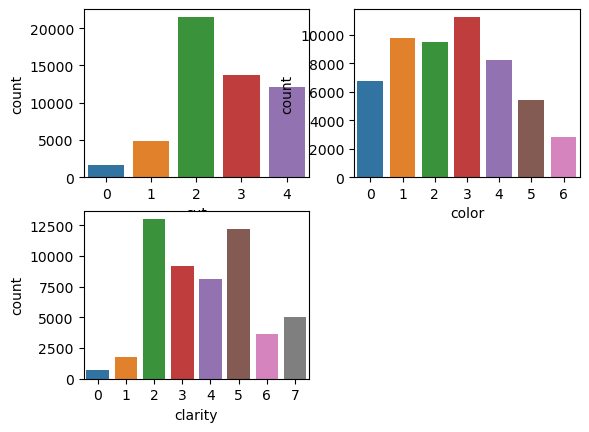

In [63]:
count=1
for i in cat_col:
    plt.subplots_adjust()
    plt.subplot(2,2,count)
    sns.countplot(data[i])
    count+=1

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  int32  
 2   color    53794 non-null  int32  
 3   clarity  53794 non-null  int32  
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   x        53794 non-null  float64
 7   y        53794 non-null  float64
 8   z        53794 non-null  float64
 9   price    53794 non-null  int64  
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.9 MB


In [69]:
num_col=data.select_dtypes(['float64','int64']).columns
num_col

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

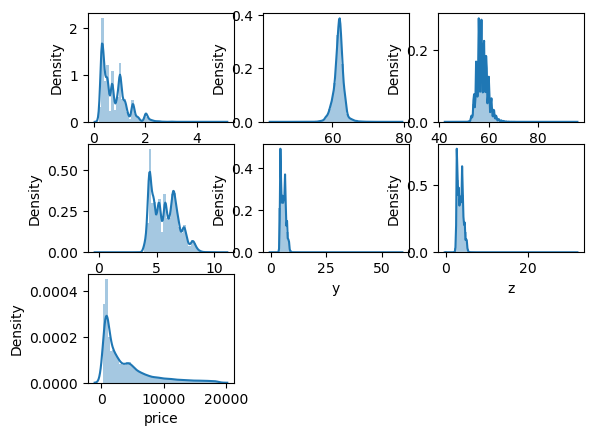

In [72]:
count=1
for i in num_col:
    plt.subplots_adjust()
    plt.subplot(3,3,count)
    sns.distplot(data[i])
    count+=1

In [181]:
y=np.log(data.price)

In [81]:
corr=data.corrwith(y)
corr

carat      0.921548
cut        0.040196
color      0.171825
clarity   -0.071218
depth     -0.011048
table      0.126566
x          0.884504
y          0.865395
z          0.861208
price      1.000000
dtype: float64

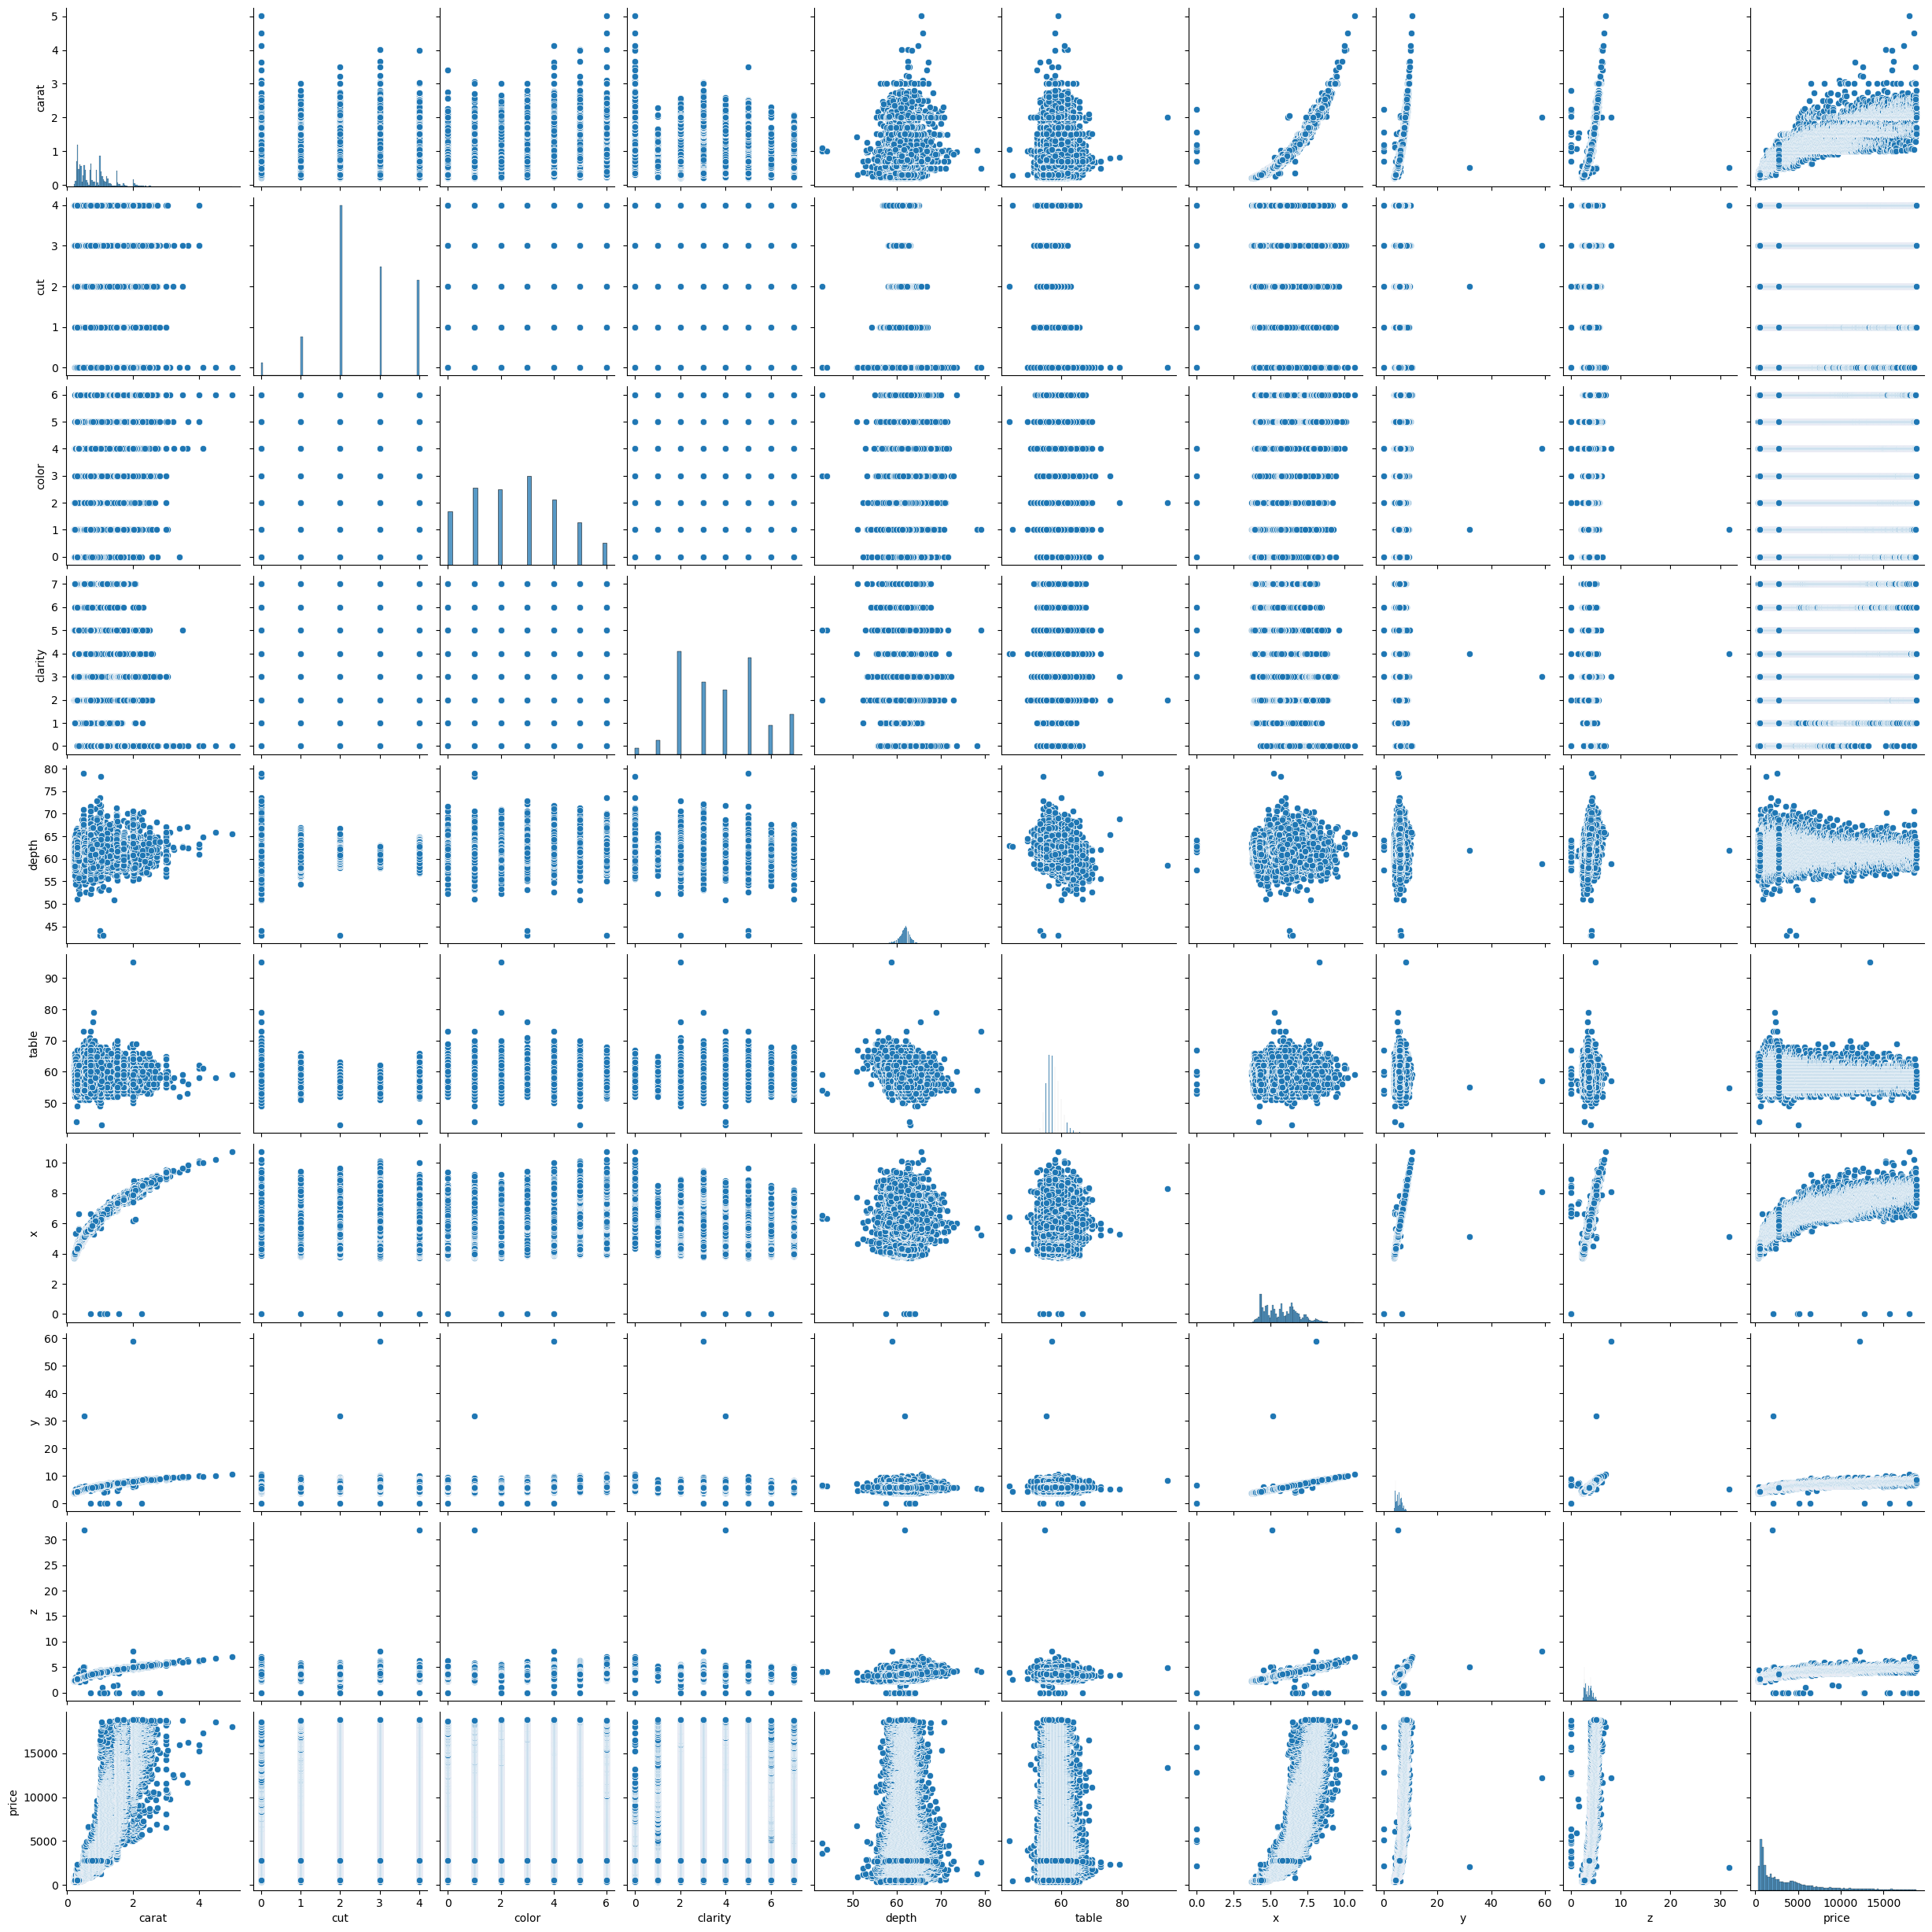

In [84]:
sns.pairplot(data)

<AxesSubplot:>

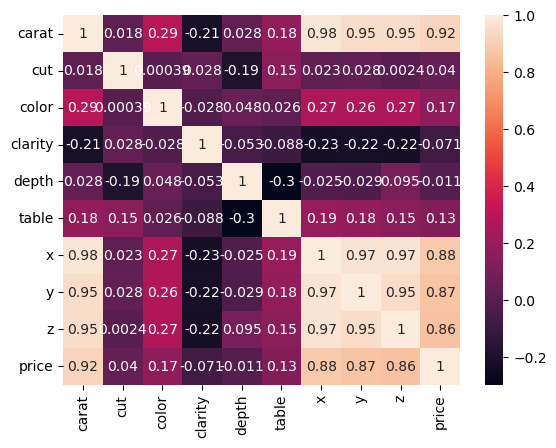

In [90]:
sns.heatmap(data.corr(),annot=True)

In [182]:
x=data.drop(columns=['price'])

In [183]:
scaler=StandardScaler()
X=scaler.fit_transform(x)

In [184]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [185]:
# linear regression

In [186]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [187]:
predictions=linear_model.predict(x_test)

In [188]:
# metrics

In [189]:
from sklearn import metrics

In [190]:
r2_train=metrics.r2_score(y_test,predictions)
r2_train

0.9436755123406826

In [191]:
linear_model.score(x_train,y_train)

0.946524781270907

In [192]:
mse=metrics.mean_squared_error(y_test,predictions)
mae=metrics.mean_absolute_error(y_test,predictions)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predictions))
rmse

0.2390577065636004

In [193]:
from sklearn.model_selection import cross_val_score

In [194]:
scores=cross_val_score(linear_model,x_train,y_train,cv=3)

In [195]:
print(scores.mean())

0.9307092342291311


In [196]:
# Decision tree regressor

In [197]:
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [198]:
dt_model.score(x_train,y_train)

0.9999882832010165

In [199]:
dt_prediction=dt_model.predict(x_test)

In [200]:
r2_dt=metrics.r2_score(y_test,dt_prediction)
r2_dt

0.9837838372778065

In [201]:
mse=metrics.mean_squared_error(y_test,dt_prediction)
mae=metrics.mean_absolute_error(y_test,dt_prediction)
rmse=np.sqrt(metrics.mean_squared_error(y_test,dt_prediction))
rmse

0.1282709084566777

In [202]:
scores1=cross_val_score(dt_model,x_train,y_train,cv=3)

In [203]:
scores1.mean()

0.9830718788120522

In [204]:
# random forest regression

In [205]:
rdt_model=RandomForestRegressor()
rdt_model.fit(x_train,y_train)

RandomForestRegressor()

In [206]:
rdt_model.score(x_train,y_train)

0.9988127900007374

In [207]:
rdt_model.feature_importances_

array([0.08221907, 0.0008632 , 0.01549878, 0.03029506, 0.00151256,
       0.0011672 , 0.01344486, 0.85291863, 0.00208063])

In [208]:
rdt_predict=rdt_model.predict(x_test)

In [209]:
r2_rdt=metrics.r2_score(y_test,rdt_predict)
r2_rdt

0.9914893002659587

In [210]:
mse=metrics.mean_squared_error(y_test,dt_prediction)
mae=metrics.mean_absolute_error(y_test,dt_prediction)
rmse=np.sqrt(metrics.mean_squared_error(y_test,dt_prediction))
rmse

0.1282709084566777

In [211]:
# ADABOOST regressor

In [212]:
adt_model=AdaBoostRegressor(base_estimator=dt_model)
adt_model.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

In [213]:
adt_model.score(x_train,y_train)

0.9999602699760147

In [214]:
adt_pred=adt_model.predict(x_test)

In [215]:
r2_adt=metrics.r2_score(y_test,adt_pred)
r2_adt

0.9912025384665286

In [216]:
mse=metrics.mean_squared_error(y_test,adt_pred)
mae=metrics.mean_absolute_error(y_test,adt_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,adt_pred))
rmse

0.09447846138442206

In [217]:
# Bagging regresora
from sklearn.ensemble import BaggingRegressor


In [218]:
bag_model=BaggingRegressor(base_estimator=dt_model)
bag_model.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor())

In [219]:
bag_model.score(x_train,y_train)

0.9983739121976649

In [220]:
r2_bag_pred=bag_model.predict(x_test)

In [221]:
r2_bag_score=metrics.r2_score(y_test,r2_bag_pred)

In [222]:
r2_bag_score

0.9906025279129322

In [223]:
mse=metrics.mean_squared_error(y_test,r2_bag_pred)
mae=metrics.mean_absolute_error(y_test,r2_bag_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,r2_bag_pred))
rmse

0.09764716658561129

In [224]:
# Gradient boosting

In [225]:
grad_model=GradientBoostingRegressor()
grad_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [226]:
grad_model.score(x_train,y_train)

0.9877164605131681

In [227]:
r2_grad_pred=grad_model.predict(x_test)

In [228]:
r2_grad=metrics.r2_score(y_test,r2_grad_pred)
r2_grad

0.9868715690207664

In [229]:
mse=metrics.mean_squared_error(y_test,r2_grad_pred)
mae=metrics.mean_absolute_error(y_test,r2_grad_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,r2_grad_pred))
rmse

0.11541454302837025

In [230]:
# xgboost

In [231]:
xgr=xg.XGBRegressor()

In [232]:
xgr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [233]:
xgr.score(x_train,y_train)

0.994560365107184

In [234]:
r2_xg=xgr.predict(x_test)

In [235]:
r2_xg_pred=metrics.r2_score(y_test,r2_xg)
r2_xg_pred

0.9921439295804668

In [236]:
mse=metrics.mean_squared_error(y_test,r2_xg)
mae=metrics.mean_absolute_error(y_test,r2_xg)
rmse=np.sqrt(metrics.mean_squared_error(y_test,r2_xg))
rmse

0.08928053983750878

In [237]:
df=pd.DataFrame(y_test)
df['prediction']=xgr.predict(x_test)

In [238]:
df['Error']=df['price']-df['prediction']

<AxesSubplot:xlabel='Error', ylabel='Density'>

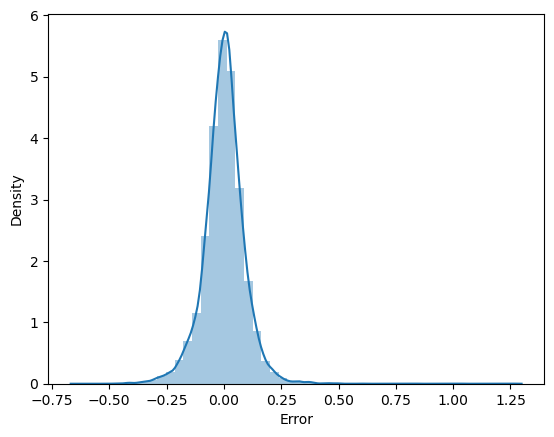

In [239]:
sns.distplot(df['Error'])

In [240]:
import statsmodels.api as sm

In [241]:
df['Error'].skew()

0.17280112313889104

In [242]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

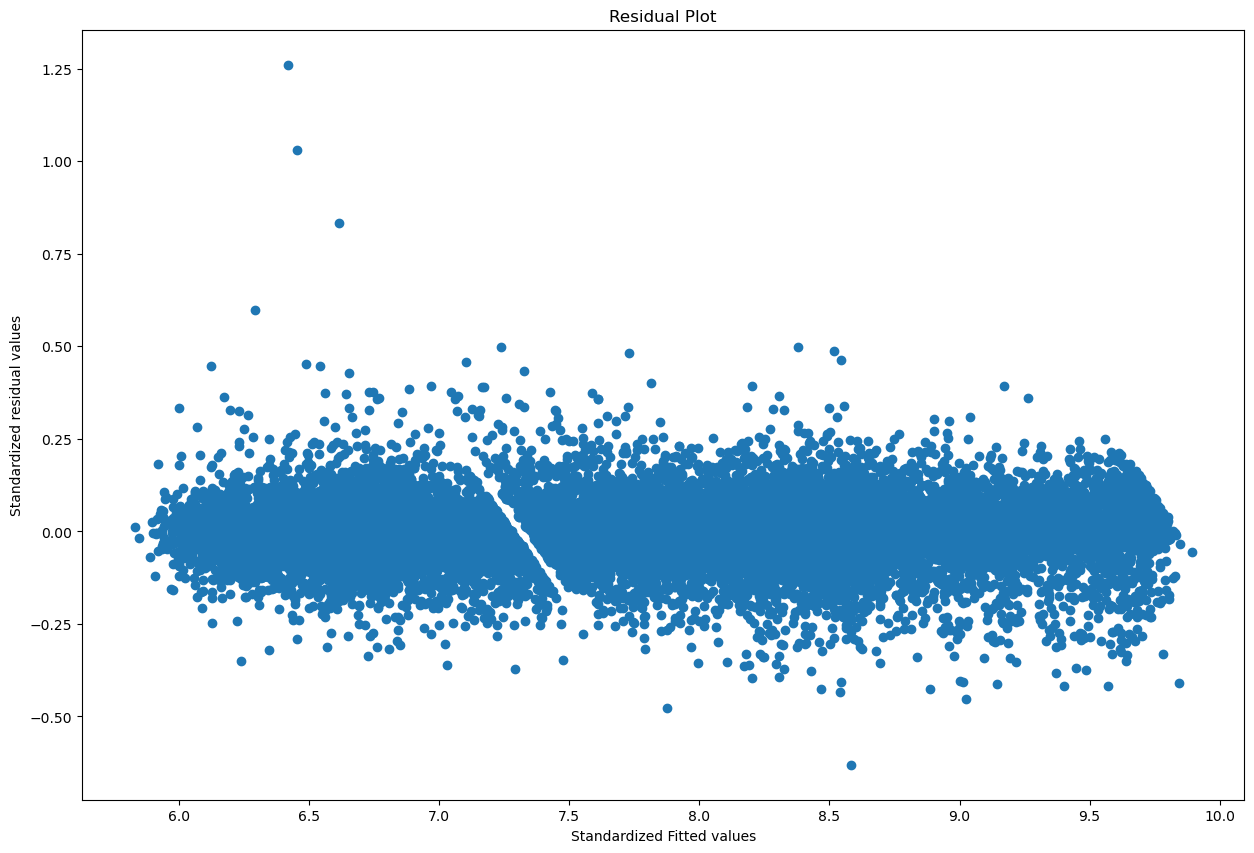

In [243]:
plt.figure(figsize=(15,10))
scatterplot=plt.scatter(df.prediction,df.Error)

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

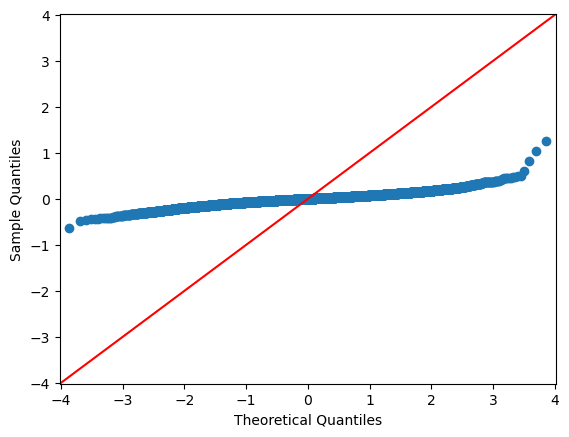

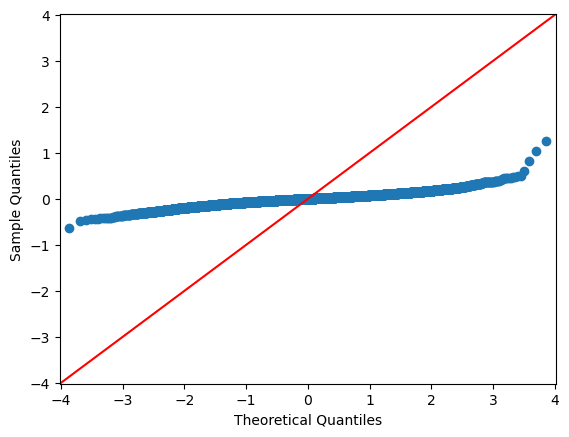

In [245]:
sm.qqplot(df.Error,line='45')